In [1]:
import os
import time
import sys
import scipy
import glob
import importlib
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

from datetime import datetime

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [5]:
util.set_sns_style(style='dark')
%matplotlib notebook

rootdir = util.get_rootdir()
rootdir

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data'

In [6]:
# root_dir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
rootdir = util.get_rootdir()
experiment = 'vertical_strip/paired_experiments'
src_dir = os.path.join(rootdir, experiment)

fig_id = os.path.join('/Edge_Tracking', rootdir.split('/Edge_Tracking/')[1], experiment)
print(fig_id)
savedir = '{}/jyr/{}'.format(rootdir, experiment)
savedir = savedir.replace(" ", "")
figdir = os.path.join(savedir, 'figures')
print("Saving figures to:{}    {}".format('\n', figdir))
if not os.path.exists(figdir):
    os.makedirs(figdir)

/Edge_Tracking/Data/vertical_strip/paired_experiments
Saving figures to:
    /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/paired_experiments/figures


In [7]:
src_dir = os.path.join(savedir, 'raw')
log_files = sorted([k for k in glob.glob(os.path.join(src_dir, '*.log'))\
                if 'lossed tracking' not in k], key=util.natsort)
print("Found {} tracking files.".format(len(log_files)))

Found 38 tracking files.


In [105]:
#curr_savedir = os.path.join(figdir, 'examples')
curr_savedir = '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/paired_experiments/figures/examples'

if not os.path.exists(curr_savedir):
    os.makedirs(curr_savedir)
print("Saving examples to: {}".format(curr_savedir))

Saving examples to: /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/paired_experiments/figures/examples


In [8]:
strip_width=50
strip_sep=200
# is_csv = False
df0_all = butil.load_combined_df(log_files=log_files, logdf=None, 
                                is_csv=False, experiment=experiment, 
                                savedir=savedir, save_errors=True, create_new=False,
                                parse_filename=True, remove_invalid=True, process=False)
#df0_all = df0_all.rename(columns={'Unnamed: 0': 'frame'})
condition_list = df0_all['condition'].unique()

loading existing combined df


In [11]:
df0_all['fly_id'].unique()

array(['20200630-fly1', '20200630-fly2', '20200630-fly3', '20200708-fly4',
       '20200708-fly4b', '20200708-fly5', '20200710-fly6',
       '20200710-fly6b', '20200710-fly7', '20200710-fly8',
       '20200720-fly10', '20200720-fly9'], dtype=object)

['air' 'odor' 'reinforced']


<IPython.core.display.Javascript object>


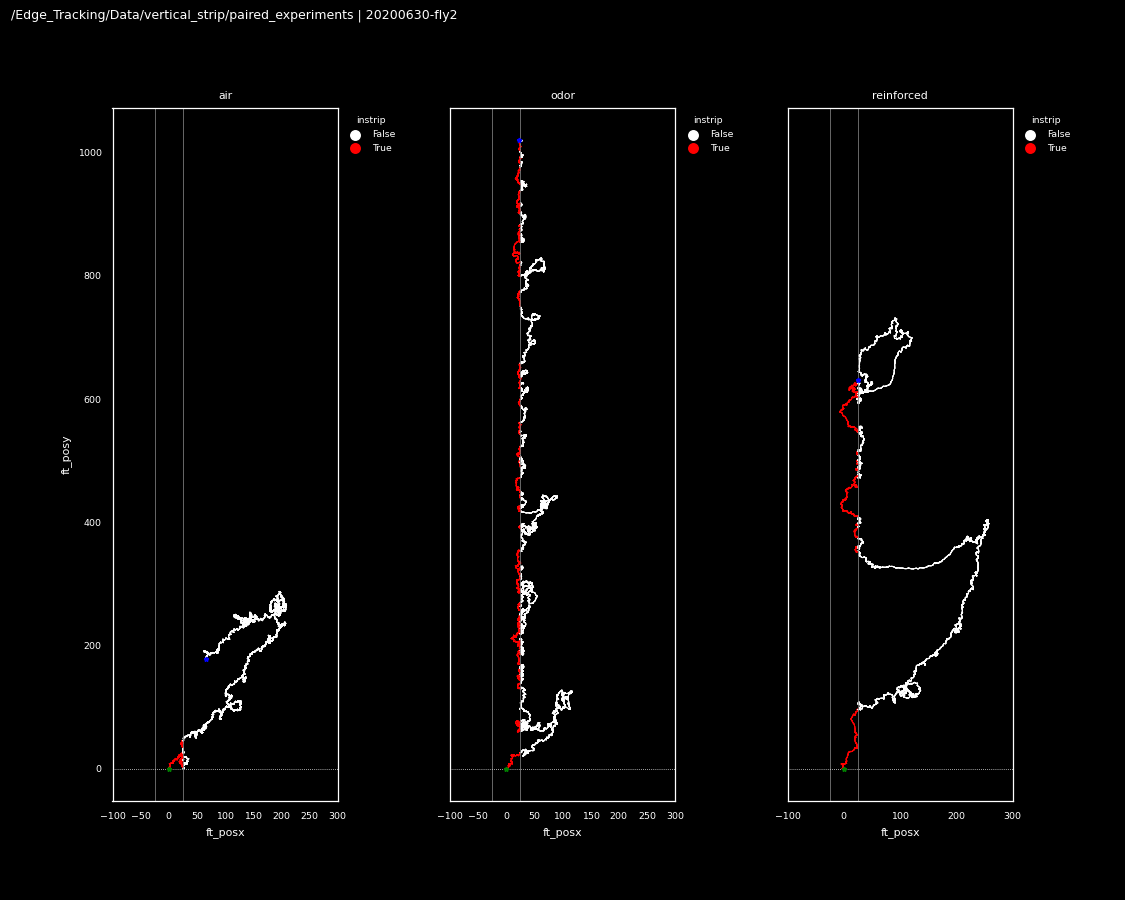

In [35]:
fly_id = '20200630-fly2'

df = df0_all[df0_all['fly_id']==fly_id].copy()
curr_conds = df['condition'].unique()
print(curr_conds)
           
fig, axn = pl.subplots(1, len(curr_conds), figsize=(10,8), sharey=True)
for ci, (cond, df_) in enumerate(df.groupby('condition')):
    ax=axn[ci]
    odor_bounds = butil.find_strip_borders(df_, strip_width=strip_width, strip_sep=strip_sep)
    ax = butil.plot_trajectory(df_, start_at_odor=True, ax=ax, odor_bounds=odor_bounds)
    ax.set_title(cond)
    ax.set_xlim([-100, 300])
pl.subplots_adjust(left=0.1, right=0.9, wspace=0.5)

util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_alltraj'.format(fly_id)

pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)), dpi=300)
pl.savefig(os.path.join(curr_savedir, '{}.svg'.format(figname)), dpi=300)

<IPython.core.display.Javascript object>


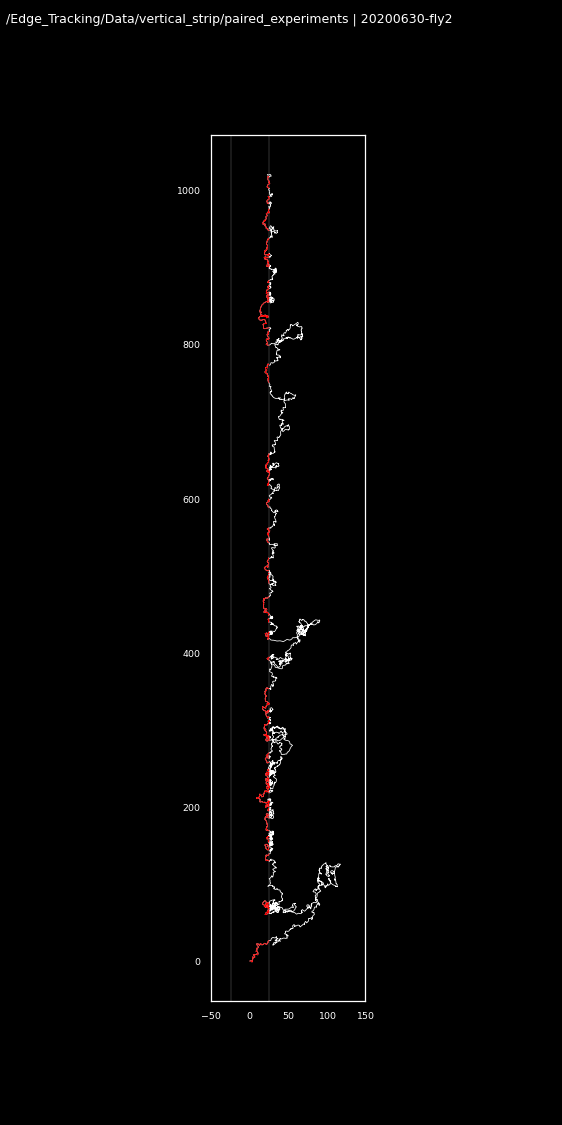

In [54]:
curr_cond = 'odor'
df_ = df[df['condition']==curr_cond].copy()
odor_bounds = butil.find_strip_borders(df_, strip_width=strip_width, strip_sep=strip_sep)

fig, ax = pl.subplots(figsize=(5, 10))
# sns.lineplot(x='ft_posx', y='ft_posy', data=df_, ax=ax)
ax.plot(df_['ft_posx'], df_['ft_posy'], lw=0.5, c='w')
ax.set_aspect(1)
butil.plot_odor_corridor(ax, odor_xmin=odor_bounds[0][0], odor_xmax=odor_bounds[0][1], odor_linewidth=0.25)

for bnum, b_ in df_[df_['instrip']].groupby('boutnum'):
    ax.plot(b_['ft_posx'], b_['ft_posy'], lw=0.5, c='r')
    
ax.set_xlim([-50, 150])


util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_odortraj'.format(fly_id)

pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)), dpi=300)
pl.savefig(os.path.join(curr_savedir, '{}.svg'.format(figname)), dpi=300)

In [58]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [68]:
fpath = '/mnt/minerva/plume-tracking/behavior-logfiles/logfiles/20230201-122017_strip_grid_fly2-PAM-ChR-fasted_000.log'
df0 = butil.load_dataframe(fpath, remove_invalid=False)
df0 = butil.process_df(df0)


odor_ix = df0[df0['instrip']].iloc[0].name
df_ = df0.loc[odor_ix:].copy()

<IPython.core.display.Javascript object>


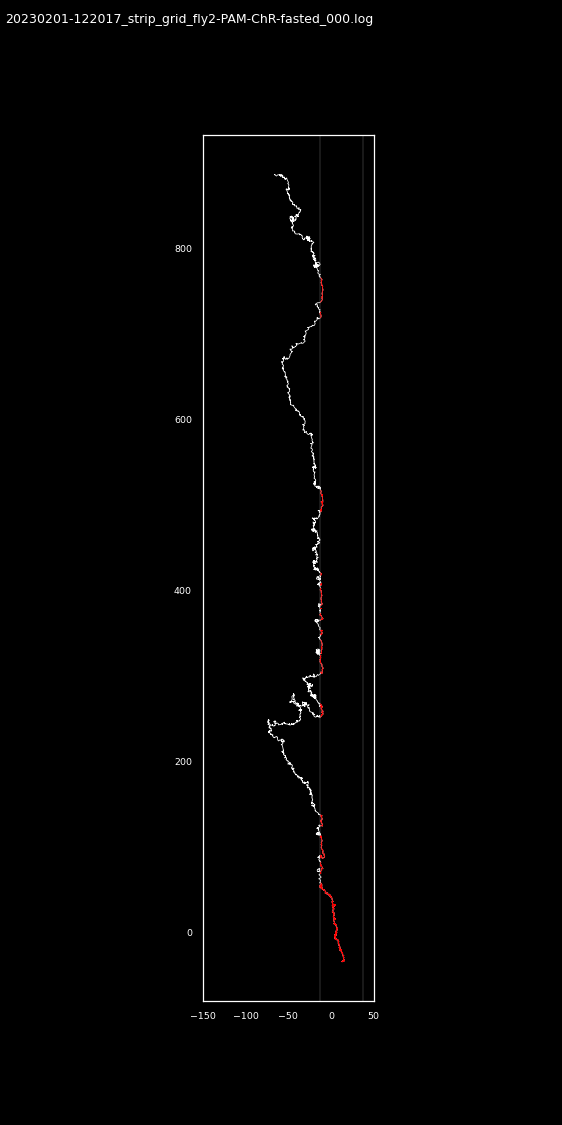

In [82]:
odor_bounds = butil.find_strip_borders(df_, strip_width=strip_width, strip_sep=strip_sep)

fig, ax = pl.subplots(figsize=(5, 10))
# sns.lineplot(x='ft_posx', y='ft_posy', data=df_, ax=ax)
ax.plot(df_['ft_posx'], df_['ft_posy'], lw=0.5, c='w')
ax.set_aspect(1)
butil.plot_odor_corridor(ax, odor_xmin=odor_bounds[0][0], odor_xmax=odor_bounds[0][1], odor_linewidth=0.25)
for bnum, b_ in df_[df_['instrip']].groupby('boutnum'):
    ax.plot(b_['ft_posx'], b_['ft_posy'], lw=0.5, c='r')
ax.set_xlim([-150, 50])


util.label_figure(fig, '{}'.format(os.path.split(fpath)[-1]))
fly_id = os.path.splitext(os.path.split(fpath)[-1])[0]
figname = '{}_odortraj'.format(fly_id)

pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)), dpi=300)
pl.savefig(os.path.join(curr_savedir, '{}.svg'.format(figname)), dpi=300)

In [107]:
fpath = '/mnt/minerva/plume-tracking/behavior-logfiles/logfiles/20230126-175229_strip_grid_fly1_001.log'
df0 = butil.load_dataframe(fpath, remove_invalid=False)
df0 = butil.process_df(df0)

odor_ix = df0[df0['instrip']].iloc[0].name
df_ = df0.loc[odor_ix:].copy()

df_['ft_posx'] = df_['ft_posx'] - float(df_.loc[odor_ix]['ft_posx'])

<IPython.core.display.Javascript object>


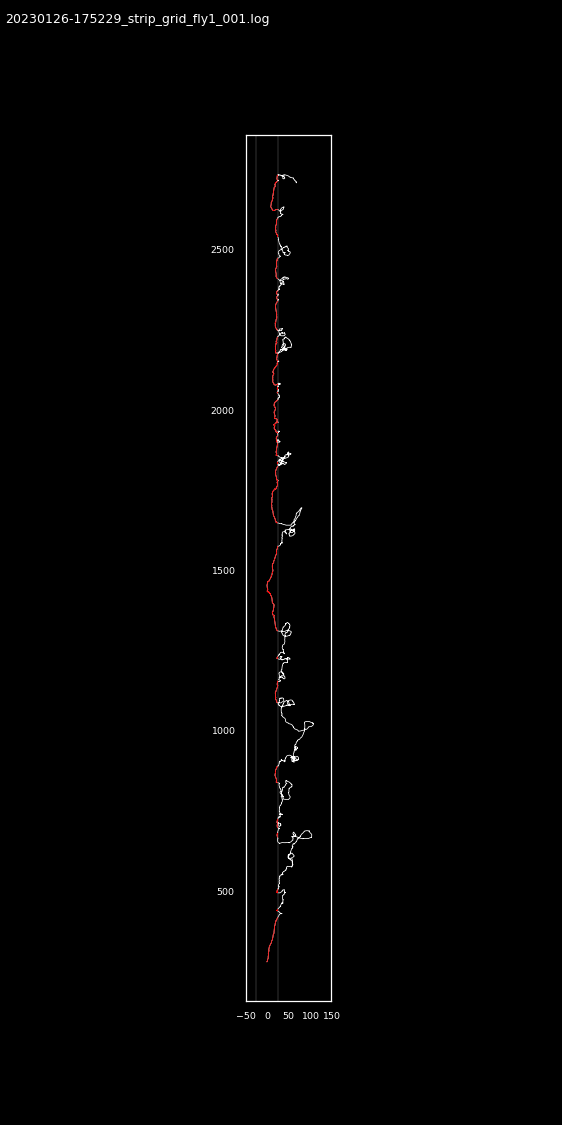

In [109]:
odor_bounds = butil.find_strip_borders(df_, strip_width=strip_width, strip_sep=strip_sep)

fig, ax = pl.subplots(figsize=(5, 10))
# sns.lineplot(x='ft_posx', y='ft_posy', data=df_, ax=ax)
ax.plot(df_['ft_posx'], df_['ft_posy'], lw=0.5, c='w')
ax.set_aspect(0.75)
butil.plot_odor_corridor(ax, odor_xmin=odor_bounds[0][0], odor_xmax=odor_bounds[0][1], odor_linewidth=0.25)
for bnum, b_ in df_[df_['instrip']].groupby('boutnum'):
    ax.plot(b_['ft_posx'], b_['ft_posy'], lw=0.5, c='r')
ax.set_xlim([-50, 150])
ax.set_xticks([-50, 0, 50, 100, 150])

util.label_figure(fig, '{}'.format(os.path.split(fpath)[-1]))
fly_id = os.path.splitext(os.path.split(fpath)[-1])[0]
figname = '{}_odortraj'.format(fly_id)

pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)), dpi=300)
pl.savefig(os.path.join(curr_savedir, '{}.svg'.format(figname)), dpi=300)


In [193]:
fpath = '/mnt/minerva/plume-tracking/behavior-logfiles/logfiles/20230112-110700_strip_grid_fly1_002.log'
df0 = butil.load_dataframe(fpath, remove_invalid=False)
df0 = butil.process_df(df0)

# find bodaries
odor_bounds_all = butil.find_strip_borders(df0, strip_width=strip_width, strip_sep=strip_sep)
odor_bounds = [odor_bounds_all[0]]

odor_ix = df0[df0['instrip']].iloc[0].name
odor_ix2 = df0[(df0['ft_posx']>200) & (df0['instrip'])].iloc[0].name
df_ = df0.loc[odor_ix:odor_ix2].copy()

# odor_ix2 = df_[(df_['ft_posx']>200) & (df_['instrip'])].iloc[0].name
# df_ = df_.loc[odor_ix2:].copy()
x_offset = float(df_.loc[odor_ix]['ft_posx'])
df_['ft_posx'] = df_['ft_posx'] - x_offset
odor_bounds = [ (odor_bounds[0][0]- x_offset, odor_bounds[0][1] - x_offset)]

In [194]:
np.arange(-200, 200, 50)

array([-200, -150, -100,  -50,    0,   50,  100,  150])

<IPython.core.display.Javascript object>


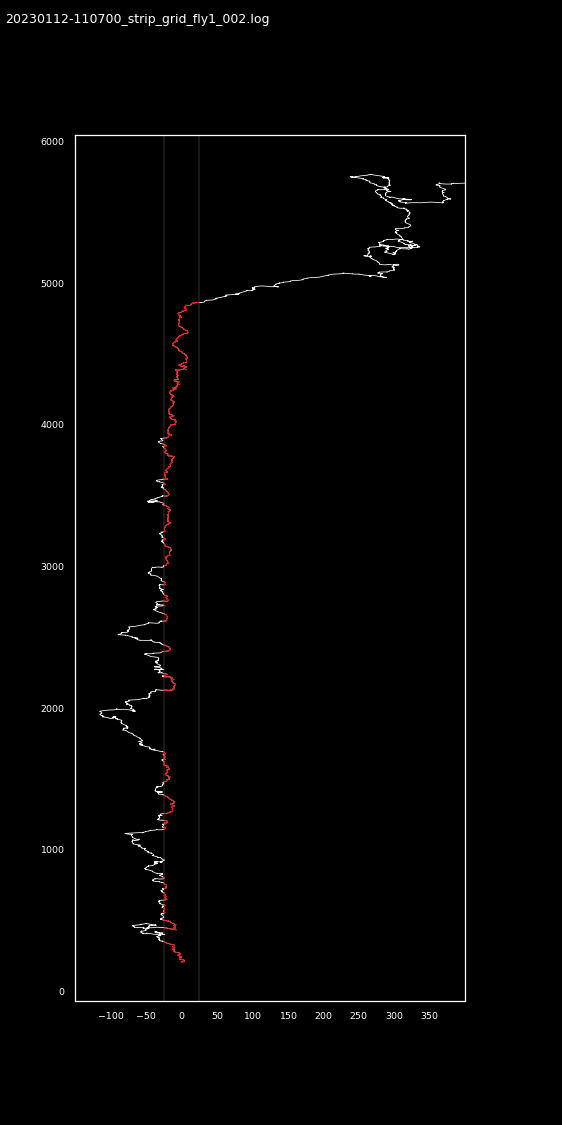

In [195]:
fig, ax = pl.subplots(figsize=(5, 10))
# sns.lineplot(x='ft_posx', y='ft_posy', data=df_, ax=ax)
ax.plot(df_['ft_posx'], df_['ft_posy'], lw=0.5, c='w')
ax.set_aspect(0.2)
butil.plot_odor_corridor(ax, odor_xmin=odor_bounds[0][0], odor_xmax=odor_bounds[0][1], odor_linewidth=0.25)
for bnum, b_ in df_[df_['instrip']].groupby('boutnum'):
    ax.plot(b_['ft_posx'], b_['ft_posy'], lw=0.5, c='r')
ax.set_xlim([-150, 400])
ax.set_xticks(np.arange(-100, 400, 50))
pl.subplots_adjust(left=0.01, right=0.95)
util.label_figure(fig, '{}'.format(os.path.split(fpath)[-1]))
fly_id = os.path.splitext(os.path.split(fpath)[-1])[0]
figname = '{}_odortraj'.format(fly_id)

pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)), dpi=300)
pl.savefig(os.path.join(curr_savedir, '{}.svg'.format(figname)), dpi=300)

<IPython.core.display.Javascript object>


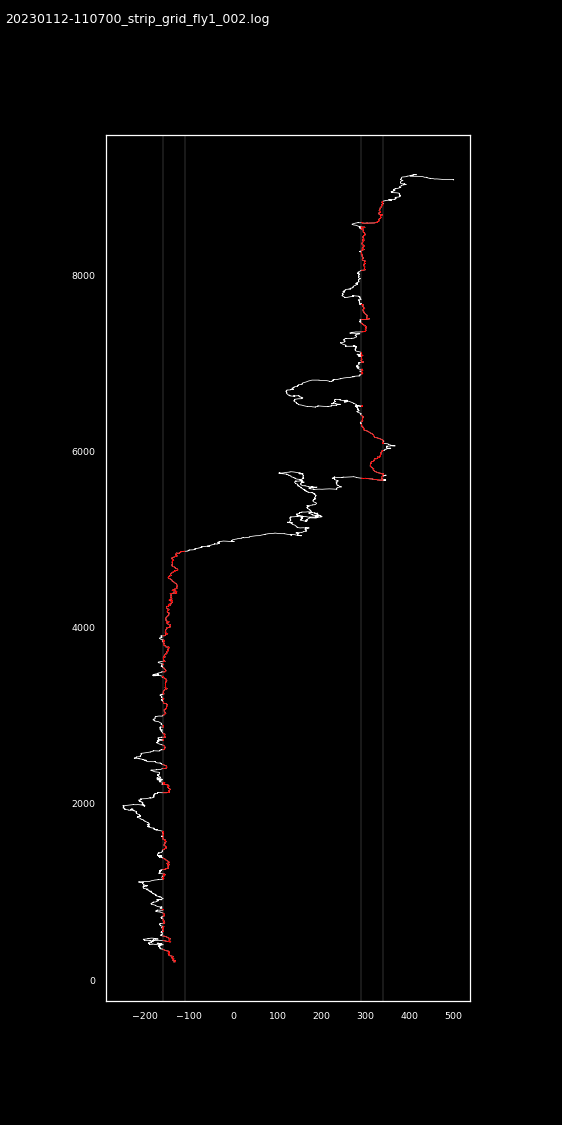

In [197]:

# plot full 
df_ = df0.loc[odor_ix:].copy()

fig, ax = pl.subplots(figsize=(5, 10))
# sns.lineplot(x='ft_posx', y='ft_posy', data=df_, ax=ax)
ax.plot(df_['ft_posx'], df_['ft_posy'], lw=0.5, c='w')
ax.set_aspect(0.2)

for ob in odor_bounds_all:
    butil.plot_odor_corridor(ax, odor_xmin=ob[0], odor_xmax=ob[1], odor_linewidth=0.25)
for bnum, b_ in df_[df_['instrip']].groupby('boutnum'):
    ax.plot(b_['ft_posx'], b_['ft_posy'], lw=0.5, c='r')
# ax.set_xlim([-150, 400])
# ax.set_xticks(np.arange(-100, 400, 50))
# pl.subplots_adjust(left=0.01, right=0.95)
util.label_figure(fig, '{}'.format(os.path.split(fpath)[-1]))
fly_id = os.path.splitext(os.path.split(fpath)[-1])[0]
figname = '{}_odortraj-full'.format(fly_id)

pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)), dpi=300)
pl.savefig(os.path.join(curr_savedir, '{}.svg'.format(figname)), dpi=300)


In [212]:
fpath = '/mnt/minerva/plume-tracking/behavior-logfiles/logfiles/20230111-145039_strip_grid_fly1_004.log'
df0 = butil.load_dataframe(fpath, remove_invalid=False)
df0 = butil.process_df(df0)

# find bodaries
odor_bounds_all = butil.find_strip_borders(df0, strip_width=strip_width, strip_sep=strip_sep)
odor_bounds = [odor_bounds_all[0]]

odor_ix = df0[df0['instrip']].iloc[0].name
df_ = df0[df0['ft_posy']<=1500].loc[odor_ix:].copy()

# odor_ix2 = df_[(df_['ft_posx']>200) & (df_['instrip'])].iloc[0].name
# df_ = df_.loc[odor_ix2:].copy()
x_offset = float(df_.loc[odor_ix]['ft_posx'])
df_['ft_posx'] = df_['ft_posx'] - x_offset
odor_bounds = [ (odor_bounds[0][0]- x_offset, odor_bounds[0][1] - x_offset)]

<IPython.core.display.Javascript object>


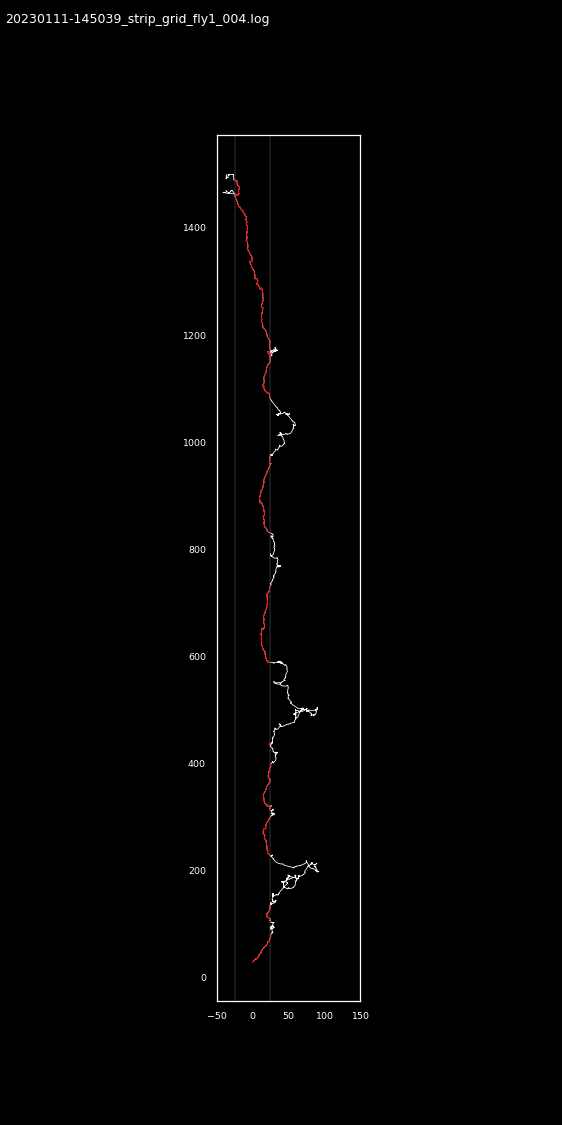

In [220]:
fig, ax = pl.subplots( figsize=(5, 10), sharey=False)
# sns.lineplot(x='ft_posx', y='ft_posy', data=df_, ax=ax)
ax.plot(df_['ft_posx'], df_['ft_posy'], lw=0.5, c='w')
for bnum, b_ in df_[df_['instrip']].groupby('boutnum'):
    ax.plot(b_['ft_posx'], b_['ft_posy'], lw=0.5, c='r')

ax.set_aspect(0.75)
butil.plot_odor_corridor(ax, odor_xmin=odor_bounds[0][0], odor_xmax=odor_bounds[0][1], odor_linewidth=0.25)
ax.set_xlim([-50, 150])
util.label_figure(fig, '{}'.format(os.path.split(fpath)[-1]))
fly_id = os.path.splitext(os.path.split(fpath)[-1])[0]
figname = '{}_odortraj-prexover'.format(fly_id)

pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)), dpi=300)
pl.savefig(os.path.join(curr_savedir, '{}.svg'.format(figname)), dpi=300)

#### pam activation 1

In [199]:
fpath = '/mnt/minerva/plume-tracking/behavior-logfiles/logfiles/20230201-110341_PAM_activation_fly1-PAM-ChR-fasted-ythresh1000_000.log'
df0 = butil.load_dataframe(fpath, remove_invalid=False)
df0 = butil.process_df(df0)

odor_ix = df0[df0['instrip']].iloc[0].name
df_ = df0.loc[odor_ix:].copy()

df_['ft_posx'] = df_['ft_posx'] - float(df_.loc[odor_ix]['ft_posx'])

<IPython.core.display.Javascript object>


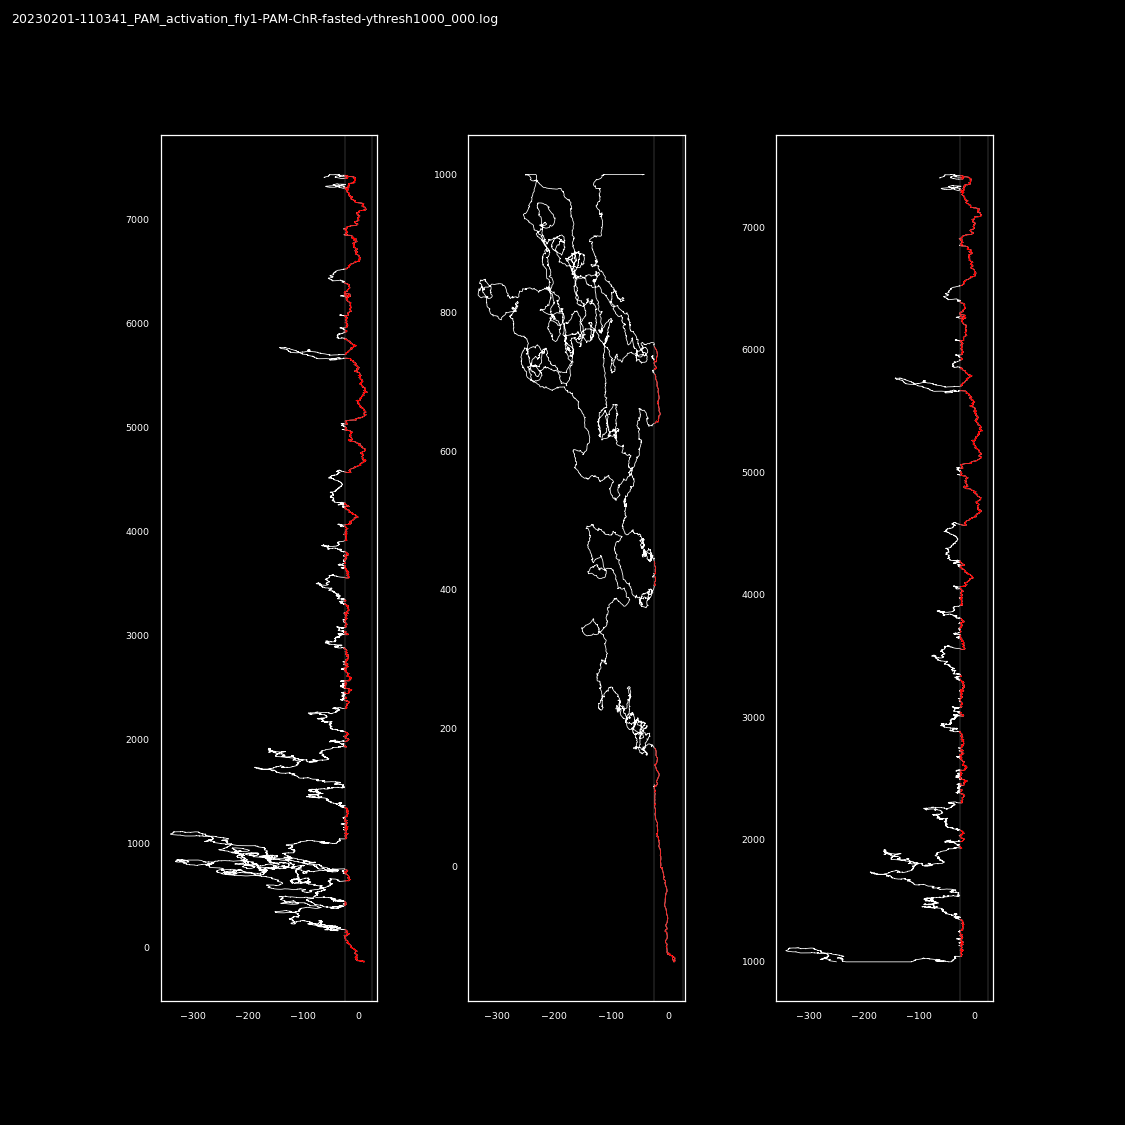

In [208]:
fig, axn = pl.subplots(1, 3, figsize=(10, 10), sharey=False)
# sns.lineplot(x='ft_posx', y='ft_posy', data=df_, ax=ax)
ax=axn[0]
ax.plot(df_['ft_posx'], df_['ft_posy'], lw=0.5, c='w')
for bnum, b_ in df_[df_['instrip']].groupby('boutnum'):
    ax.plot(b_['ft_posx'], b_['ft_posy'], lw=0.5, c='r')

ax=axn[1]
ax.plot(df_[df_['ft_posy']<1000]['ft_posx'], df_[df_['ft_posy']<1000]['ft_posy'], lw=0.5, c='w')
for bnum, b_ in df_[(df_['instrip']) & (df_['ft_posy']<1000)].groupby('boutnum'):
    ax.plot(b_['ft_posx'], b_['ft_posy'], lw=0.5, c='r')

ax=axn[2]
ax.plot(df_[df_['ft_posy']>=1000]['ft_posx'], df_[df_['ft_posy']>=1000]['ft_posy'], lw=0.5, c='w')
for bnum, b_ in df_[(df_['instrip']) & (df_['ft_posy']>=1000)].groupby('boutnum'):
    ax.plot(b_['ft_posx'], b_['ft_posy'], lw=0.5, c='r')

for ax in axn:
    ax.set_box_aspect(4)
    butil.plot_odor_corridor(ax, odor_xmin=odor_bounds[0][0], odor_xmax=odor_bounds[0][1], odor_linewidth=0.25)
    
util.label_figure(fig, '{}'.format(os.path.split(fpath)[-1]))
fly_id = os.path.splitext(os.path.split(fpath)[-1])[0]
figname = '{}_odortraj'.format(fly_id)

# pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)), dpi=300)
# pl.savefig(os.path.join(curr_savedir, '{}.svg'.format(figname)), dpi=300)

In [198]:
print(curr_savedir, figname)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/paired_experiments/figures/examples 20230112-110700_strip_grid_fly1_002_odortraj-full


#### smaller excursions, split bout

In [123]:
fpath = '/mnt/minerva/plume-tracking/behavior-logfiles/logfiles/20230105-182650_strip_grid_fly1_004.log'
df0 = butil.load_dataframe(fpath, remove_invalid=False)
df0 = butil.process_df(df0)

# find bodaries
odor_bounds_all = butil.find_strip_borders(df0, strip_width=strip_width, strip_sep=strip_sep)
odor_bounds = [odor_bounds_all[1]]

odor_ix = df0[df0['instrip']].iloc[0].name
df_ = df0.loc[odor_ix:].copy()

odor_ix2 = df_[(df_['ft_posx']>200) & (df_['instrip'])].iloc[0].name
df_ = df_.loc[odor_ix2:].copy()
x_offset = float(df_.loc[odor_ix2]['ft_posx'])
df_['ft_posx'] = df_['ft_posx'] - x_offset

odor_bounds = [ (odor_bounds_all[1][0]- x_offset, odor_bounds_all[1][1] - x_offset)]

<IPython.core.display.Javascript object>


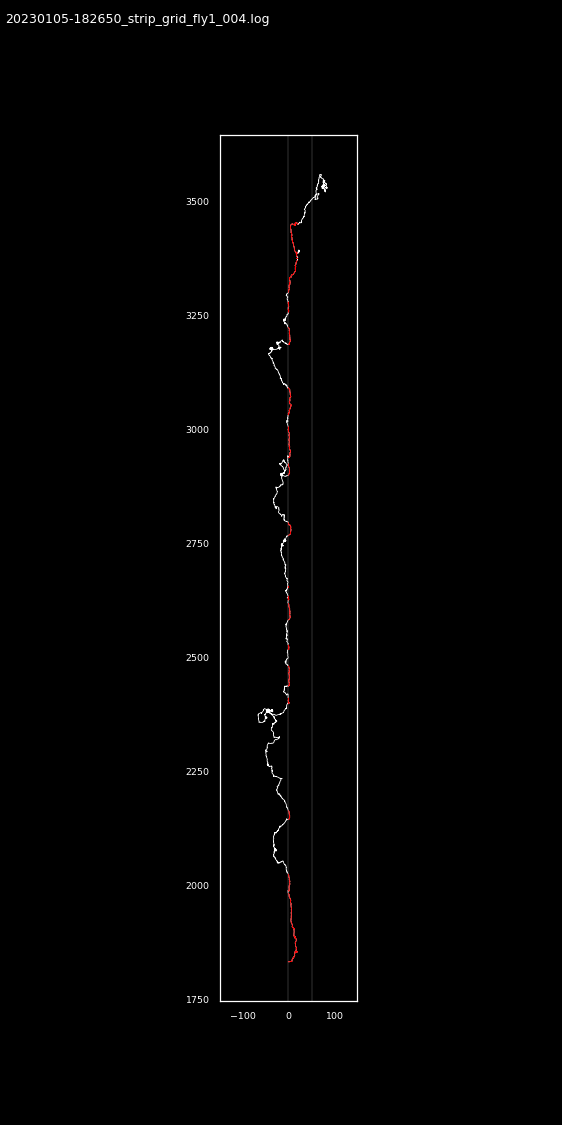

In [127]:
fig, ax = pl.subplots(figsize=(5, 10))
# sns.lineplot(x='ft_posx', y='ft_posy', data=df_, ax=ax)
ax.plot(df_['ft_posx'], df_['ft_posy'], lw=0.5, c='w')
ax.set_aspect(1)
butil.plot_odor_corridor(ax, odor_xmin=odor_bounds[0][0], odor_xmax=odor_bounds[0][1], odor_linewidth=0.25)
for bnum, b_ in df_[df_['instrip']].groupby('boutnum'):
    ax.plot(b_['ft_posx'], b_['ft_posy'], lw=0.5, c='r')
ax.set_xlim([-150, 150])

util.label_figure(fig, '{}'.format(os.path.split(fpath)[-1]))
fly_id = os.path.splitext(os.path.split(fpath)[-1])[0]
figname = '{}_odortraj'.format(fly_id)